## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data for Song Emotion Predictive Model

In [ ]:
song_df_with_audio_features = pd.read_csv('/song_df_with_audio_features.csv')
song_df_with_lyrics = pd.read_csv('/song_df_with_lyrics.csv')

# Merge the two dataframes
df = pd.merge(song_df_with_audio_features, song_df_with_lyrics, on='song_id')

# Drop duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

In [ ]:
df.columns

,spotify_id,track,artist,album,release_date,danceability,energy,key,loudness,mode,...,liveness,tempo,duration_ms,time_signature,valence,arousal,mood_quadrant,valence_sign,arousal_sign,final_lyrics
0,32xfcxu2gKRVmDopzlmnUc,Nothing Much,My Bubba,Wild & You,2011-10-07,0.488,0.251,11,-12.351,1,...,0.2420,99.639,166547,4,-0.150000,0.075000,low_valence_high_arousal,negative,positive,cool side cool side cool side cool side the co...
1,1ocORq8GJBUAIJdi8QPgme,Oh Kiss No,My Bubba,Wild & You,2011-10-07,0.639,0.209,0,-12.915,0,...,0.3730,87.412,171840,4,-0.450000,-0.250000,low_valence_low_arousal,negative,negative,yeah yeah im a virgin yeah i stay lurkin stay ...
2,2bhwPUsgts9pmZIbMvlHZV,Vultures,Who's Panda,We Are the Lovers,2013-08-15,0.560,0.856,8,-6.028,1,...,0.0785,125.024,215127,4,0.225000,-0.175000,high_valence_low_arousal,positive,negative,hey kid wan na hear something bug when the kni...
3,4xIlIbQDXw9BXVFcBdPrvW,All Is Right,Short Hand,Attila!,2009-01-01,0.563,0.488,9,-10.370,1,...,0.4540,80.734,185526,4,-0.075000,-0.300000,low_valence_low_arousal,negative,negative,a day in falsettoland dr mendel at work you go...
4,1X5DB8JnEDPiPskaxLIbfk,Afro,The Jon Spencer Blues Explosion,Extra Width,1993-05-24,0.599,0.847,6,-5.818,0,...,0.0704,124.528,175920,4,0.400000,0.075000,high_valence_high_arousal,positive,positive,one one two three four every second i have ill...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40394,24F3ihRNv4jXnDmyLcndv7,Coming Back To You,Brennan Heart,Coming Back To You,2018-04-12,0.545,0.697,1,-2.842,0,...,0.0835,149.996,230400,4,0.733333,0.166667,high_valence_high_arousal,positive,positive,through these city light you materialize then ...
40395,7ySLrv3uzL7BabRErcXxsH,Heat,Capitol K,Island Row,2000,0.412,0.934,0,-9.179,0,...,0.3880,109.047,344760,4,0.440000,-0.055556,high_valence_low_arousal,positive,negative,da da ala di da da ala di da da di da da di da...
40396,0lVgcBHLjcVpgamCfUQ8XV,Phillips Van,Rubblebucket,Rubblebucket,2009-10-13,0.636,0.750,6,-5.561,1,...,0.1640,97.942,292533,4,0.733333,0.166667,high_valence_high_arousal,positive,positive,we be dress to the t today step outside we wal...
40397,06CbN3Evc5CFCEQ9V1zMEf,Heartburn,Concord Dawn,Air Chrysalis,2012-06-21,0.384,0.971,8,-2.480,1,...,0.2660,174.024,356949,4,0.733333,0.166667,high_valence_high_arousal,positive,positive,a free album from concord dawn especially for ...


In [ ]:
df['release_year'] = df['release_date'].str[:4].astype(int)

In [ ]:
df.columns

Index(['spotify_id', 'track', 'artist', 'album', 'release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
       'time_signature', 'valence', 'arousal', 'mood_quadrant', 'valence_sign',
       'arousal_sign', 'final_lyrics', 'release_year'],
      dtype='object')

#### Heatmap of Audio Features Correlation

In [ ]:
to_heatmap_df = df[['danceability', 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'valence', 'arousal']]  

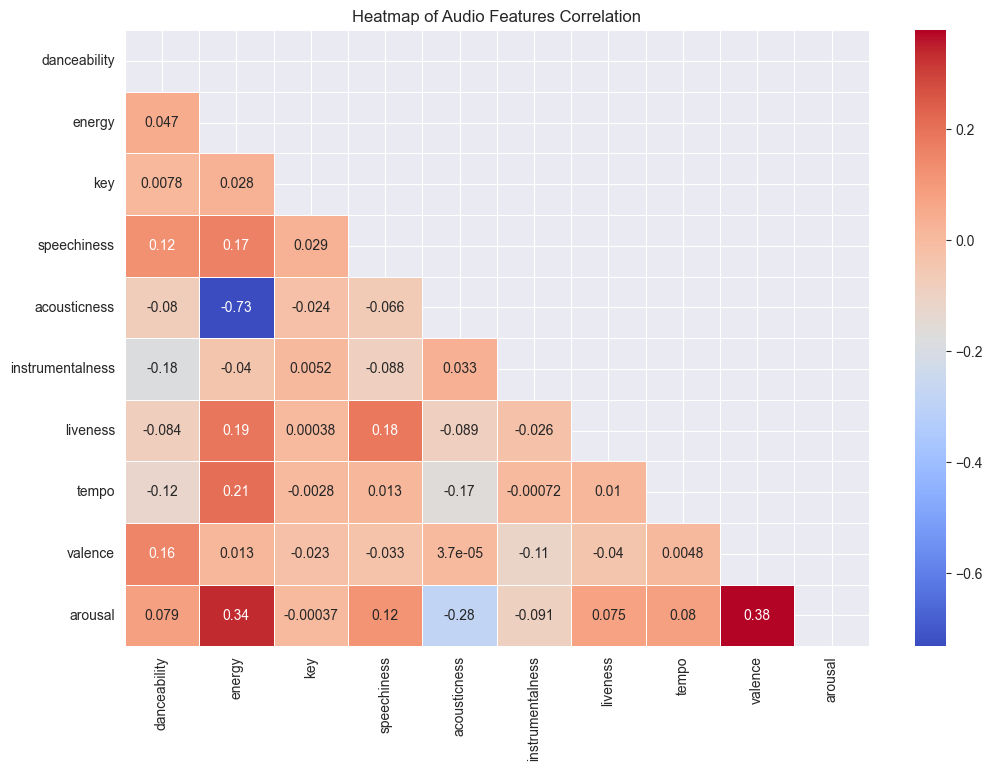

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")

# Create the mask to hide the upper triangle
mask = np.triu(np.ones_like(to_heatmap_df.corr(), dtype=bool))

# Create the heatmap with masking
sns.heatmap(to_heatmap_df.corr(), mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Heatmap of Audio Features Correlation')

# Change background color (optional)
plt.gcf().set_facecolor('white') 

plt.savefig('/Users/nokiapnx/Desktop/senior year/Senior Project/EDA graph/heatmap_trans.png', format='png', dpi=600, transparent=True)

# Show the plot
plt.show()

#### Distribution of Audio Features by Mood Quadrant using Violin Plot 

In [ ]:
to_violin_df = df[[ 'danceability', 'acousticness', 'instrumentalness', 'energy', 'liveness', 'speechiness', 'mood_quadrant']]  

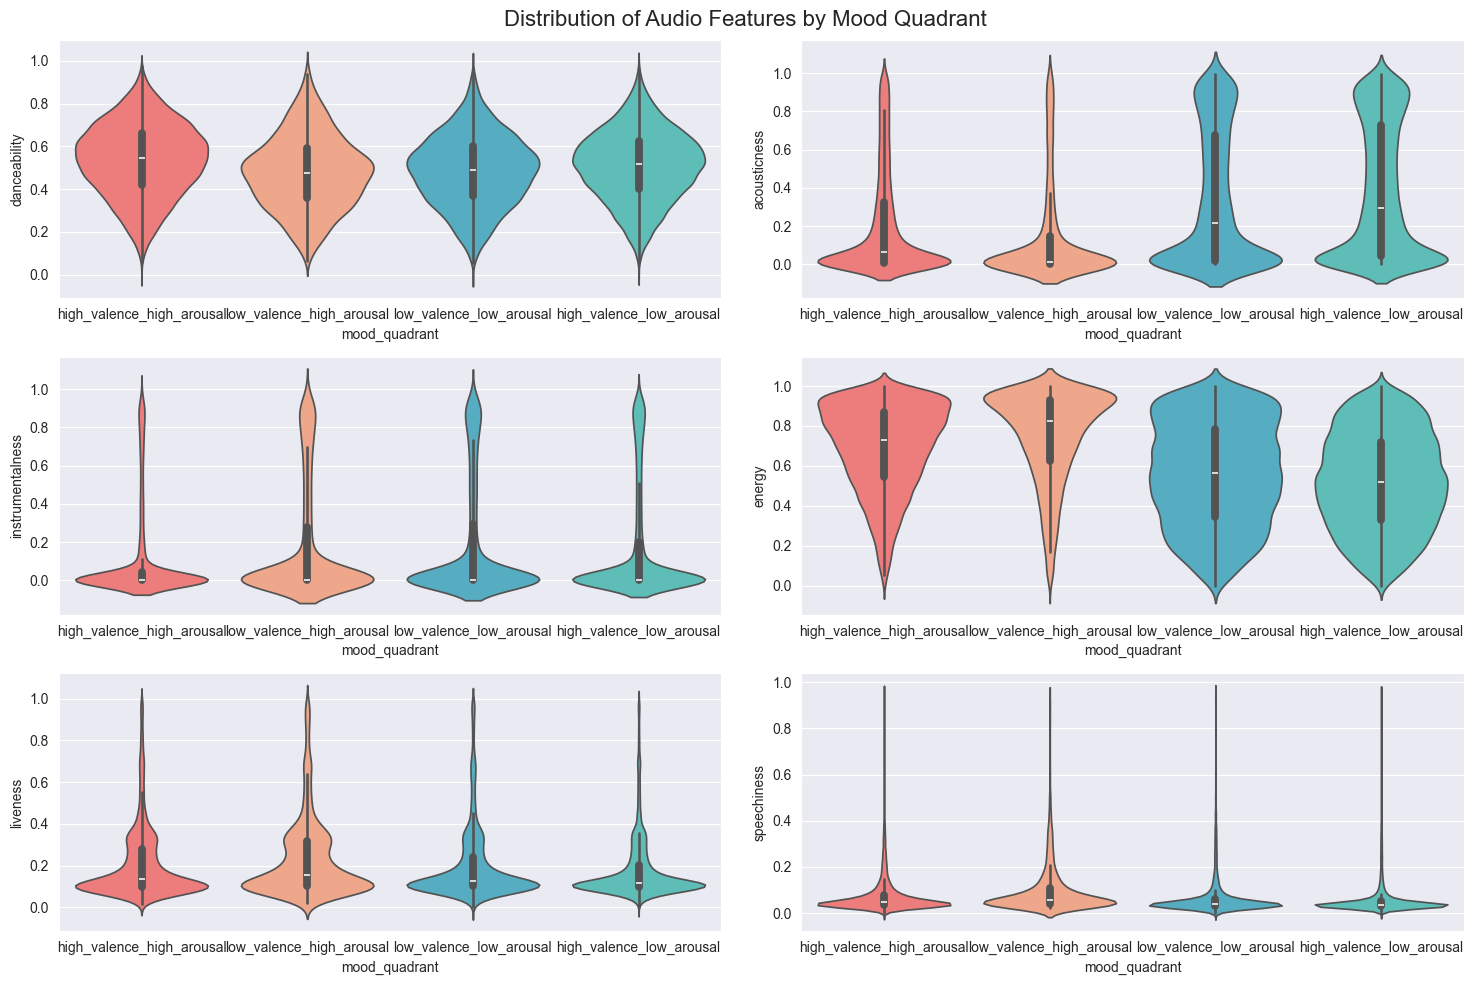

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

order = ['high_valence_high_arousal', 'low_valence_high_arousal', 'low_valence_low_arousal', 'high_valence_low_arousal']

# Create violin plots for each feature
for i, feature in enumerate(to_violin_df.columns[:-1]):
    row, col = i // 2, i % 2
    sns.violinplot(x='mood_quadrant', y=feature, data=to_violin_df, hue= 'mood_quadrant', order=order, palette=['#FFA07A', '#45B7D1', '#4ECDC4', '#FF6B6B'], ax=axes[row, col])

# Customize the plots
plt.suptitle('Distribution of Audio Features by Mood Quadrant', fontsize=16)
plt.tight_layout()
plt.show()

#### Count of Songs by Mood Quadrant

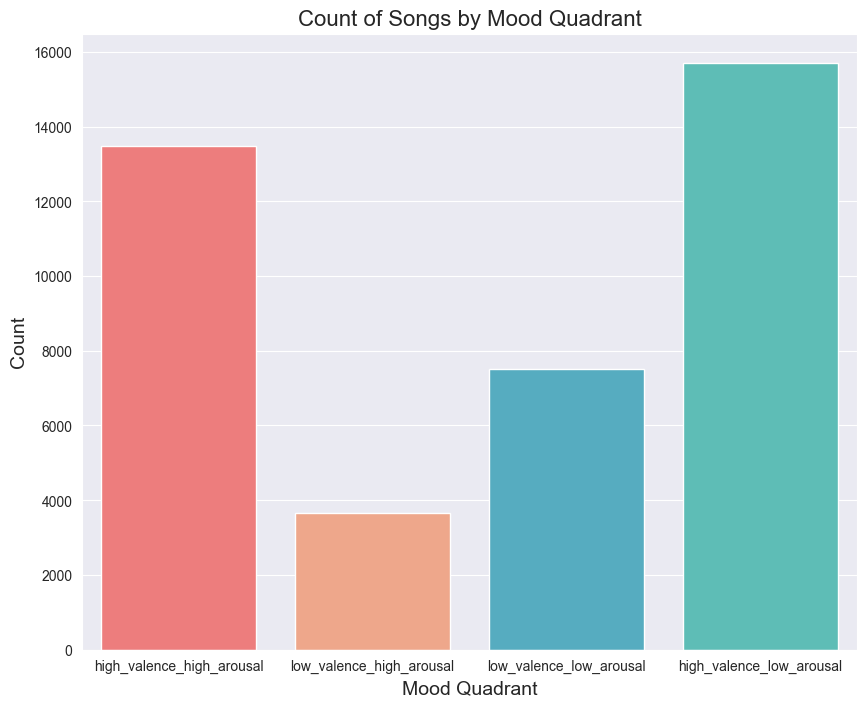

In [16]:
# Count of emotions

# Assuming your DataFrame is named 'df'
order = ['high_valence_high_arousal', 'low_valence_high_arousal', 'low_valence_low_arousal', 'high_valence_low_arousal']  # Define your desired order

plt.figure(figsize=(10, 8))
sns.countplot(x='mood_quadrant', data=df, hue='mood_quadrant', order=order, palette=['#FFA07A', '#45B7D1', '#4ECDC4', '#FF6B6B'])
plt.title('Count of Songs by Mood Quadrant')
plt.xlabel('Mood Quadrant', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Songs by Mood Quadrant', fontsize=16)
plt.savefig('/Users/nokiapnx/Desktop/senior year/Senior Project/EDA graph/bar_trans.png', format='png', dpi=600, transparent=True)
plt.show()

### Data for Music Recommender System

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
user_df = pd.read_csv('user_listening_history_df.csv')

In [ ]:
user_df.nunique()

Unnamed: 0    8519383
track_id        25021
user_id        943291
playcount         419
dtype: int64

In [ ]:
# Group by user_id and sum the playcount
user_playcount_df = user_df.groupby("user_id")["playcount"].sum()\
                                                            .reset_index()\
                                                            .sort_values(by="user_id", ascending=False)

# Group by user_id and count the number of songs
user_num_song_df = user_df.groupby("user_id")["playcount"].count()\
                                                            .reset_index()\
                                                            .sort_values(by="user_id", ascending=False)

# Rename columns for clarity
user_num_song_df.columns = ['user_id', 'songcount']

# Merge the two dataframes
user_info_df = pd.merge(user_num_song_df, user_playcount_df, on='user_id')

In [ ]:
# Calculate number of user in each playcount
user_info_df.groupby('playcount')['user_id'].count()\
                                            .reset_index()\
                                            .rename(columns={'user_id': 'usercount'})\
                                            .sort_values(by='usercount', ascending=False)

,playcount,usercount
0,1,74052
1,2,69965
2,3,60366
3,4,51177
4,5,48043
...,...,...
638,704,1
639,706,1
640,709,1
641,710,1


#### Playcount Distribution for Users

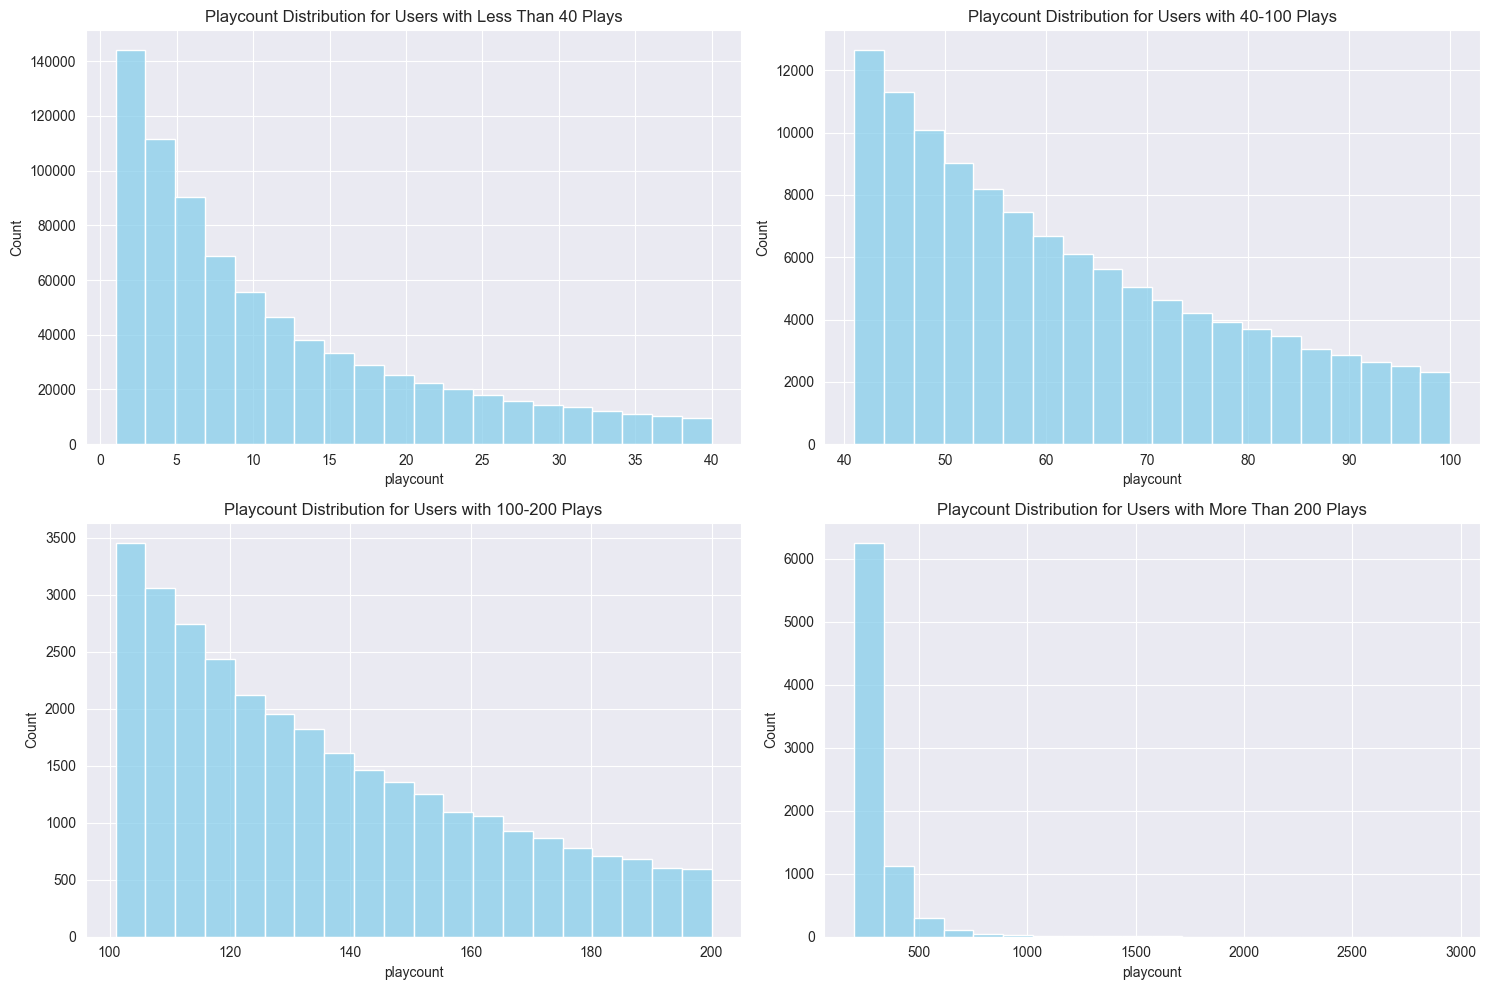

In [ ]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.set_style("darkgrid")

# First plot: Playcount <= 40
sns.histplot(data=user_info_df[user_info_df['playcount'] <= 40], x='playcount', bins=20, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Playcount Distribution for Users with Less Than 40 Plays')

# Second plot: Playcount 40-100
filtered_df = user_info_df[(user_info_df['playcount'] > 40) & (user_info_df['playcount'] <= 100)]
sns.histplot(data=filtered_df, x='playcount', bins=20, color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Playcount Distribution for Users with 40-100 Plays')

# Third plot: Playcount 100-200
filtered_df_2 = user_info_df[(user_info_df['playcount'] > 100) & (user_info_df['playcount'] <= 200)]
sns.histplot(data=filtered_df_2, x='playcount', bins=20, color='skyblue', ax=axs[1, 0])
axs[1, 0].set_title('Playcount Distribution for Users with 100-200 Plays')

# Fourth plot: Playcount > 200
sns.histplot(data=user_info_df[user_info_df['playcount'] > 200], x='playcount', bins=20, color='skyblue', ax=axs[1, 1])
axs[1, 1].set_title('Playcount Distribution for Users with More Than 200 Plays')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### User Segmentation Using K-Means clustering

In [ ]:
# Step 1: Data Preparation
user_info_df['ratio'] = user_info_df['playcount']/user_info_df['songcount']
X = user_info_df[['playcount', 'ratio']]

# Step 2: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

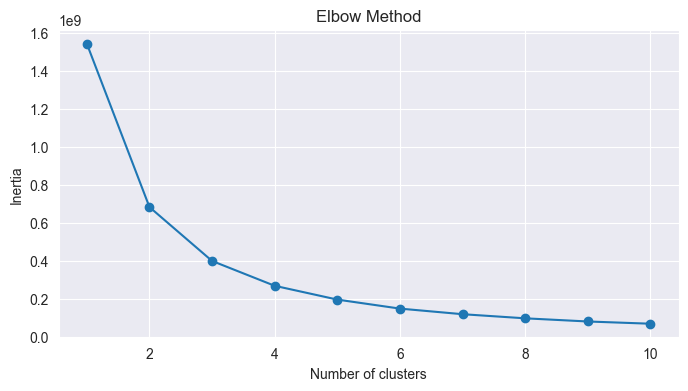

In [ ]:
# Step 3: Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Fit K-Means with k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
user_info_df['cluster_k3'] = kmeans_3.fit_predict(X)

In [ ]:
user_info_df.groupby('cluster_k3')['user_id'].count()

cluster_k3
0    797811
1     15142
2    130338
Name: user_id, dtype: int64

In [ ]:
user_info_df.to_csv('/user_info_df.csv', index=False)